In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.cloud import bigquery
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans


project_id = "takareinhard"
client = bigquery.Client(project=project_id)

query = """
select
  *
from
  `takareinhard.sandbox.access_log_ga4`
"""
df = client.query(query).to_dataframe()
df

,user_pseudo_id,session_num,pv_num,purchase_num
0,85038142.5639882863,1,0,0
1,6769277.4695040136,1,0,0
2,33249122.0720596771,1,0,0
3,2739425.0432989823,1,0,0
4,84475031.3916928958,1,0,0
...,...,...,...,...
94785,29392387.1914586824,12,39,0
94786,77419838.9395198381,12,45,0
94787,9175563.4519041873,12,80,0
94788,7385163302.4274482131,12,92,1


In [ ]:
df = df.drop("user_pseudo_id", axis=1)
df

,session_num,pv_num,purchase_num
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
94785,12,39,0
94786,12,45,0
94787,12,80,0
94788,12,92,1


In [ ]:
km = KMeans(n_clusters=5)
cluster = km.fit_predict(df)
df["cluster"] = cluster

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
km = KMeans(n_clusters=5)
cluster = km.fit_predict(df)
df["cluster"] = cluster
pd.concat([df.groupby("cluster").mean(), df["cluster"].value_counts()], axis=1)

,session_num,pv_num,purchase_num,count
cluster,,,,
0,1.121562,2.683354,0.000058,86055
1,3.594233,40.395921,0.35443,1422
2,4.584459,96.118243,0.736486,296
3,2.190157,14.222397,0.065906,7010
4,6.142857,356.428571,2.142857,7


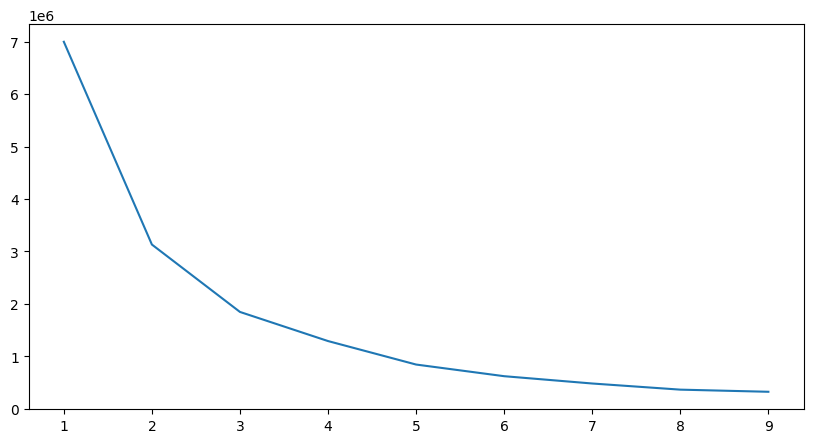

In [ ]:
sse_list = []
for i in range(1, 10):
  km = KMeans(n_clusters=i)
  cluster = km.fit_predict(df)
  sse = km.inertia_
  sse_list.append(sse)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), sse_list)
plt.show()